In [4]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data reading and understaing
bike = pd.read_csv ("day.csv")

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
bike.shape

(730, 16)

In [ ]:
# Conclusion :
##Dataset has 730 rows and 16 columns.
##Except dteday column, all other are either float or integer type.
##There are some fields that are categorical in nature, but in integer/float type.

In [ ]:
# Data Quality Check ---- Checking for missing and null values

In [8]:
## checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Conclusion:
## there are no null values

In [9]:
# Data Cleaning

#Create a copy of the  dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

bike_new = bike.iloc[:,1:16]

In [10]:
for col in bike_new:
    print(bike_new[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

In [ ]:
# insights
## there are no junk values present in the data set.

In [ ]:
# droping the columns which are not necessesary for our analysis

## instant is just a row instance identifier.
## dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
## casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [ ]:
### We will save the new dataframe as bike_updated, so that the original dataset is preserved for any future analysis/validation

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike_updated=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [14]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [16]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [17]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [19]:
## checking correlation
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [ ]:
### we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

In [21]:
# EDA

## Convert season and weathersit to categorical types

bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

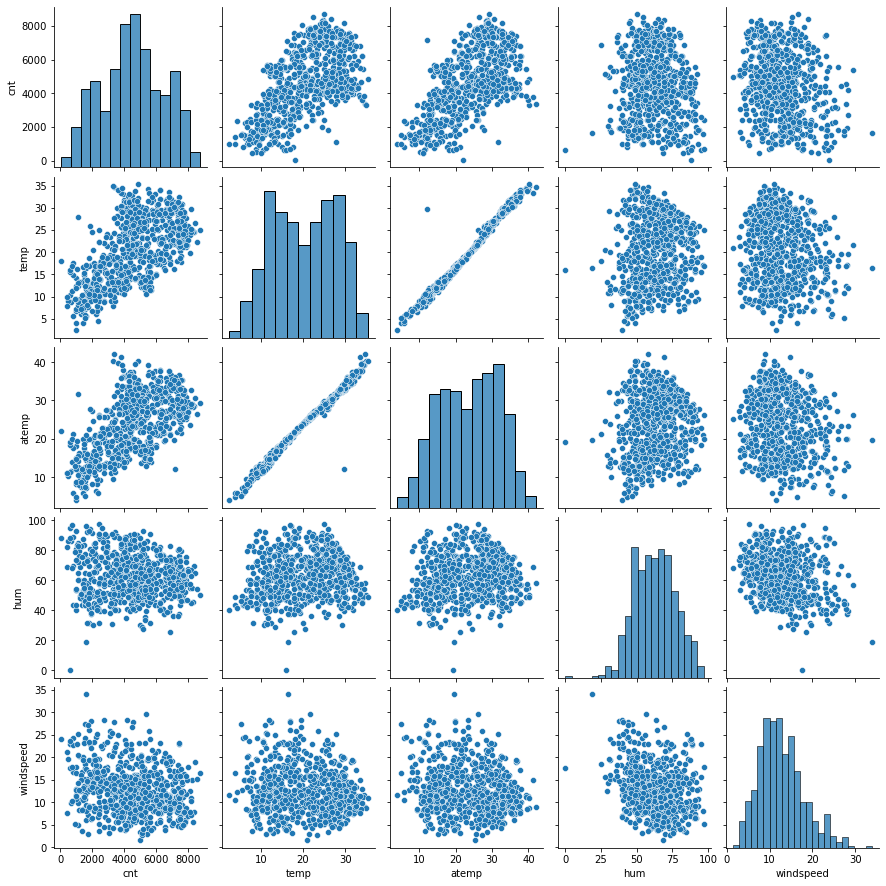

In [22]:
#Draw pairplots for continuous numeric variables to check the linear relationship
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [ ]:
# Inferences:
## looks like the temp and atemp has the highest corelation with the target variable cnt
## temp and atemp are highly co-related with each other

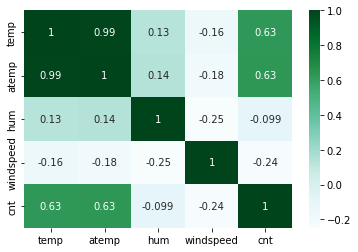

In [23]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [ ]:
### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

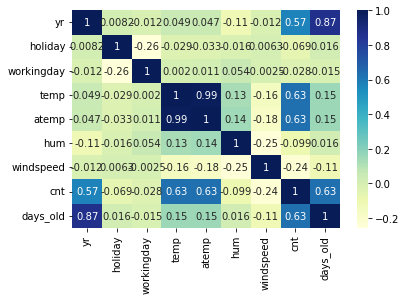

In [25]:
#Correlations for numeric variables
cor=bike.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

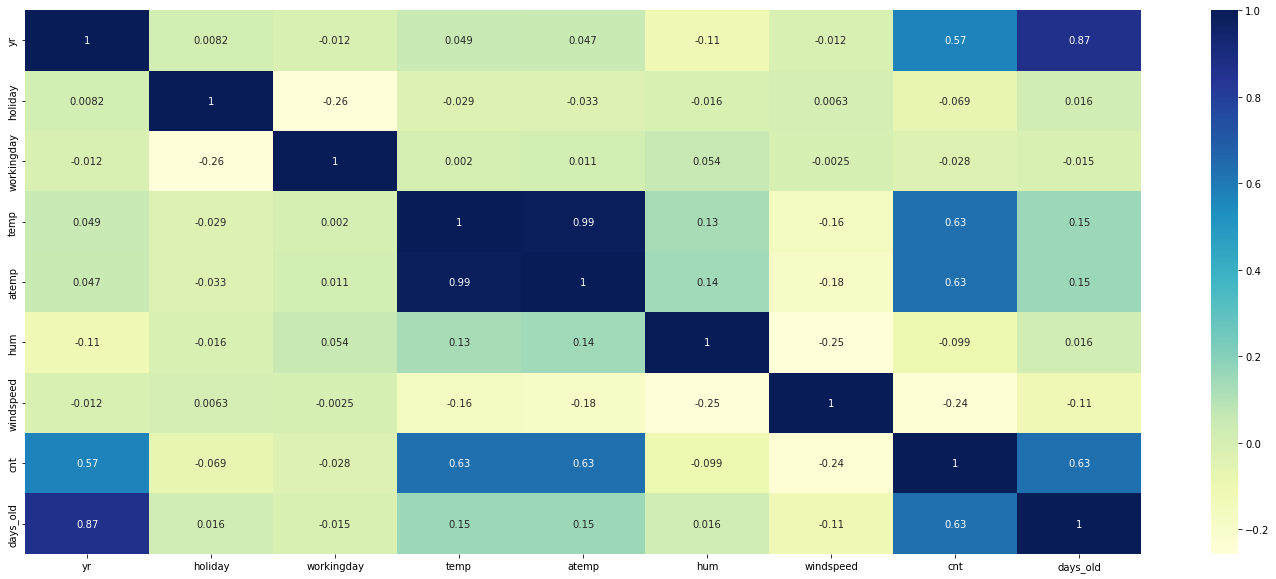

In [26]:
#Calculate Correlation
corr = bike.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [ ]:
### from the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
### we also see Target variable has a linear relationship with some of the indeptendent variables.

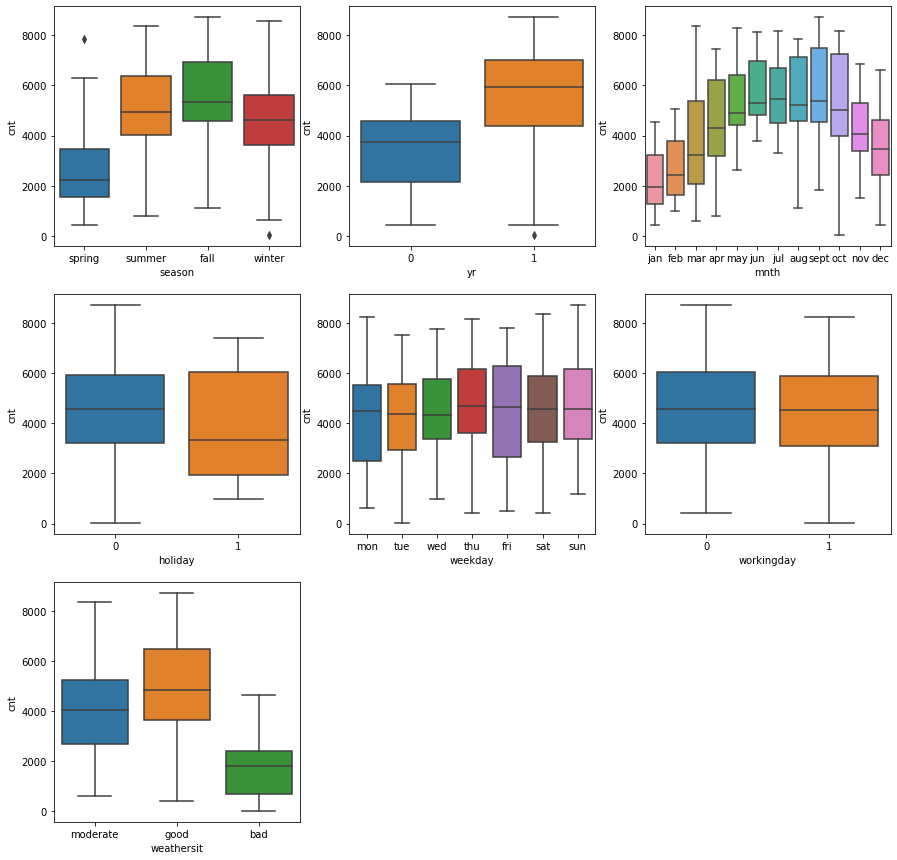

In [27]:
# analysing categorical variabels with target variables

## Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()



In [ ]:
# Inferences:
##Here many insights can be drawn from the plots

#1. Season: 3:fall has highest demand for rental bikes
#2. I see that demand for next year has grown
#3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
#4. When there is a holiday, demand has decreased.
#5. Weekday is not giving clear picture about demand.
#6. The clear weathershit has highest demand
#7. During September, bike sharing is more. During the year end and beginning, it is less.

In [28]:
# Data Preparation

## Create dummy variables for all categorical variables

bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

In [ ]:
## dropping the first columns as (p-1) dummies can explain p categories.
## in weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [29]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Model Building
## Split Data into training and test data set

In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   days_old             730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [37]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [38]:
## checking the new train data set after spliting

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   days_old             510 non-null    int64  
 8   season_spring        510 non-null    uint8  
 9   season_summer        510 non-null    uint8  
 10  season_winter        510 non-null    uint8  
 11  mnth_aug             510 non-null    uint8  
 12  mnth_dec             510 non-null    uint8  
 13  mnth_feb             510 non-null    uint8  
 14  mnth_jan             510 non-null    uint8  
 15  mnth_jul             510 non-null    u

In [39]:
df_train.shape

(510, 31)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   days_old             219 non-null    int64  
 8   season_spring        219 non-null    uint8  
 9   season_summer        219 non-null    uint8  
 10  season_winter        219 non-null    uint8  
 11  mnth_aug             219 non-null    uint8  
 12  mnth_dec             219 non-null    uint8  
 13  mnth_feb             219 non-null    uint8  
 14  mnth_jan             219 non-null    uint8  
 15  mnth_jul             219 non-null    ui

In [41]:
df_test.shape

(219, 31)

In [42]:
# RESCALING THE FEATURES

## to make all features in same scale to interpret easily

# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
## inspect stats fro Training set after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.500223,0.24902,0.247059,...,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.633333,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.294499,0.43287,0.431725,...,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.482368,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.243141,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.501372,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.762346,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.662551,0,1,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.891632,0,0,...,0,0,0,1,0,0,0,0,1,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.290809,0,0,...,0,0,0,0,0,0,1,0,1,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.979424,0,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.010974,1,0,...,0,0,0,0,0,1,0,0,1,0


In [47]:
# linear model building

## dividing into X and Y sets for the model building

y_train = df_train.pop('days_old')
X_train = df_train

In [50]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lm, n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('season_spring', False, 11),
 ('season_summer', False, 5),
 ('season_winter', False, 16),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 15),
 ('weekday_sat', False, 9),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 14),
 ('weathersit_bad', False, 8),
 ('weathersit_good', False, 7),
 ('weathersit_moderate', False, 4)]

In [57]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
## Building Linear Model using 'STATS MODEL'

In [60]:
## Model 1:

### VIF checking;

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,379.44
3,atemp,353.75
4,mnth_aug,3.33
8,mnth_jul,3.04
9,mnth_jun,2.52
11,mnth_may,2.41
14,mnth_sept,2.35
0,yr,2.05
13,mnth_oct,1.78
12,mnth_nov,1.44


In [61]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [62]:
# Check the parameters obtained

lr1.params

const        0.139928
yr           0.501135
holiday     -0.004956
temp         0.027425
atemp       -0.022454
mnth_aug     0.165561
mnth_dec     0.337185
mnth_feb    -0.080288
mnth_jan    -0.121748
mnth_jul     0.123680
mnth_jun     0.082863
mnth_mar    -0.041411
mnth_may     0.041185
mnth_nov     0.295535
mnth_oct     0.254134
mnth_sept    0.209858
dtype: float64

In [63]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.931e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:20   Log-Likelihood:                 1526.0
No. Observations:                 510   AIC:                            -3020.
Df Residuals:                     494   BIC:                            -2952.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.004     39.911      0.0

In [64]:
## Model 2

### Removing the variable 'atemp' based on its High p-value & High VIF

X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.74
3,mnth_aug,3.21
7,mnth_jul,3.00
8,mnth_jun,2.49
10,mnth_may,2.41
13,mnth_sept,2.33
0,yr,2.05
12,mnth_oct,1.78
11,mnth_nov,1.44
9,mnth_mar,1.42


In [66]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [67]:
# Check the parameters obtained

lr2.params

const        0.139852
yr           0.501157
holiday     -0.004772
temp         0.005794
mnth_aug     0.166300
mnth_dec     0.337085
mnth_feb    -0.080270
mnth_jan    -0.121606
mnth_jul     0.124131
mnth_jun     0.083266
mnth_mar    -0.041345
mnth_may     0.041345
mnth_nov     0.295494
mnth_oct     0.254066
mnth_sept    0.210217
dtype: float64

In [68]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:35:36   Log-Likelihood:                 1525.3
No. Observations:                 510   AIC:                            -3021.
Df Residuals:                     495   BIC:                            -2957.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.004     39.876      0.0

In [69]:
## Model 3

### Removing the variable 'mnth_aug' based on its High p-value & High VIF

X_train_new = X_train_new.drop(["mnth_aug"], axis = 1)

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.34
0,yr,2.04
6,mnth_jul,1.63
7,mnth_jun,1.47
9,mnth_may,1.44
12,mnth_sept,1.42
11,mnth_oct,1.25
10,mnth_nov,1.17
8,mnth_mar,1.15
3,mnth_dec,1.12


In [71]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [72]:
lr3.params

const        0.108549
yr           0.497760
holiday     -0.016946
temp         0.189553
mnth_dec     0.308880
mnth_feb    -0.102747
mnth_jan    -0.129361
mnth_jul    -0.000980
mnth_jun    -0.026349
mnth_mar    -0.080852
mnth_may    -0.048751
mnth_nov     0.260659
mnth_oct     0.191464
mnth_sept    0.116903
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3370.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:14:16   Log-Likelihood:                 1045.8
No. Observations:                 510   AIC:                            -2064.
Df Residuals:                     496   BIC:                            -2004.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1085      0.009     12.280      0.0

In [74]:
## Model 4

### Removing the variable 'mnth_jul' based on its High p-value & High VIF

X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.88
0,yr,2.04
6,mnth_jun,1.29
8,mnth_may,1.27
11,mnth_sept,1.26
10,mnth_oct,1.16
9,mnth_nov,1.13
7,mnth_mar,1.10
3,mnth_dec,1.09
4,mnth_feb,1.07


In [76]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [77]:
# Check the parameters obtained

lr4.params

const        0.108762
yr           0.497771
holiday     -0.017009
temp         0.188848
mnth_dec     0.308896
mnth_feb    -0.102750
mnth_jan    -0.129418
mnth_jun    -0.026021
mnth_mar    -0.080792
mnth_may    -0.048495
mnth_nov     0.260708
mnth_oct     0.191617
mnth_sept    0.117169
dtype: float64

In [78]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3658.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:16:37   Log-Likelihood:                 1045.8
No. Observations:                 510   AIC:                            -2066.
Df Residuals:                     497   BIC:                            -2011.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1088      0.009     12.475      0.0

In [79]:
## Model 5

### Removing the variable 'mnth_jun' based on its High p-value & High VIF

X_train_new = X_train_new.drop(["mnth_jun"], axis = 1)

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.37
0,yr,2.04
7,mnth_may,1.21
10,mnth_sept,1.20
9,mnth_oct,1.13
8,mnth_nov,1.11
3,mnth_dec,1.08
6,mnth_mar,1.08
5,mnth_jan,1.07
4,mnth_feb,1.06


In [81]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [82]:
# Check the parameters obtained

lr5.params

const        0.106750
yr           0.497779
holiday     -0.015321
temp         0.183848
mnth_dec     0.312573
mnth_feb    -0.099269
mnth_jan    -0.126365
mnth_mar    -0.076811
mnth_may    -0.043167
mnth_nov     0.264476
mnth_oct     0.196160
mnth_sept    0.122616
dtype: float64

In [83]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3846.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:20:13   Log-Likelihood:                 1036.0
No. Observations:                 510   AIC:                            -2048.
Df Residuals:                     498   BIC:                            -1997.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1067      0.009     12.040      0.0

In [85]:
# Model 6
### Removing the variable 'mnth_mar' based on its High 'p-value'.

X_train_new = X_train_new.drop(["mnth_mar"], axis = 1)

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.32
0,yr,2.00
6,mnth_may,1.20
9,mnth_sept,1.19
8,mnth_oct,1.12
7,mnth_nov,1.10
3,mnth_dec,1.07
4,mnth_feb,1.06
5,mnth_jan,1.06
1,holiday,1.05


In [87]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [88]:
# Check the parameters obtained

lr6.params

const        0.043200
yr           0.495761
holiday     -0.015605
temp         0.258179
mnth_dec     0.352397
mnth_feb    -0.057293
mnth_jan    -0.078516
mnth_may    -0.028508
mnth_nov     0.301321
mnth_oct     0.221808
mnth_sept    0.136094
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:               days_old   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3384.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:32:56   Log-Likelihood:                 979.36
No. Observations:                 510   AIC:                            -1937.
Df Residuals:                     499   BIC:                            -1890.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0432      0.008      5.705      0.0

In [ ]:
# This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

In [ ]:
#Final Model Interpretation

##Hypothesis Testing:
###Hypothesis testing states that:

     # H0:B1=B2=...=Bn=0
     # H1: at least one Bi!=0

#  From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS



In [92]:
# Error terms are normally distributed with mean zero

##Residual Analysis Of Training Data

y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

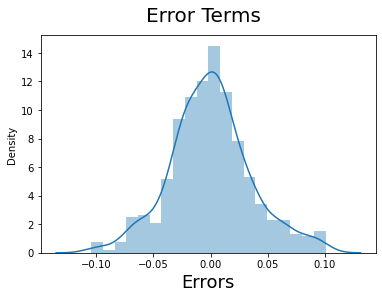

In [93]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Conclusion:

## from the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [ ]:
# There is No Multicollinearity between the predictor variables

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.32
0,yr,2.00
6,mnth_may,1.20
9,mnth_sept,1.19
8,mnth_oct,1.12
7,mnth_nov,1.10
3,mnth_dec,1.07
4,mnth_feb,1.06
5,mnth_jan,1.06
1,holiday,1.05


In [ ]:
# Conclusion : From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

In [ ]:
# MAKING PREDICTION USING FINAL MODEL

## Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model lr6

In [97]:
### applying the scaling on the test sets

###  Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
### as we want to use the metrics that the model learned from the training data to be applied on the test data. 


num_vars = ['temp', 'atemp', 'hum', 'windspeed','days_old']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [98]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
22,0,0,1,-0.072263,-0.103108,0.004712,-0.031940,0.000041,1,0,...,0,0,0,0,0,1,0,0,1,0
468,1,0,0,-0.057173,-0.089698,0.005429,-0.035472,0.000881,0,1,...,0,0,0,1,0,0,0,0,1,0
553,1,0,1,-0.044771,-0.079277,0.006193,-0.039613,0.001041,0,0,...,0,1,0,0,0,0,0,0,1,0
504,1,0,1,-0.052408,-0.086391,0.005726,-0.031447,0.000948,0,1,...,0,1,0,0,0,0,0,0,1,0
353,0,0,1,-0.061307,-0.092852,0.006427,-0.043676,0.000664,0,0,...,0,0,0,0,1,0,0,0,0,1


In [99]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,-0.056927,-0.089940,0.006884,-0.035494,0.000685,0.237443,0.264840,...,0.082192,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.036530,0.639269,0.324201
std,0.501098,0.198967,0.463759,0.006974,0.005656,0.001492,0.004909,0.000381,0.426491,0.442259,...,0.275286,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.188034,0.481313,0.469148
min,0.000000,0.000000,0.000000,-0.072263,-0.103108,0.003130,-0.043913,0.000009,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.062845,-0.094653,0.005746,-0.039002,0.000363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.056732,-0.089372,0.006881,-0.036063,0.000670,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,-0.050846,-0.085172,0.007920,-0.032755,0.000993,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,-0.043761,-0.078037,0.010498,-0.020796,0.001366,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
## dividing into X_test and y_test

y_test = df_test.pop('days_old')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   season_spring        219 non-null    uint8  
 8   season_summer        219 non-null    uint8  
 9   season_winter        219 non-null    uint8  
 10  mnth_aug             219 non-null    uint8  
 11  mnth_dec             219 non-null    uint8  
 12  mnth_feb             219 non-null    uint8  
 13  mnth_jan             219 non-null    uint8  
 14  mnth_jul             219 non-null    uint8  
 15  mnth_jun             219 non-null    ui

In [101]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   mnth_dec   219 non-null    uint8  
 5   mnth_feb   219 non-null    uint8  
 6   mnth_jan   219 non-null    uint8  
 7   mnth_may   219 non-null    uint8  
 8   mnth_nov   219 non-null    uint8  
 9   mnth_oct   219 non-null    uint8  
 10  mnth_sept  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 10.1 KB


In [102]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

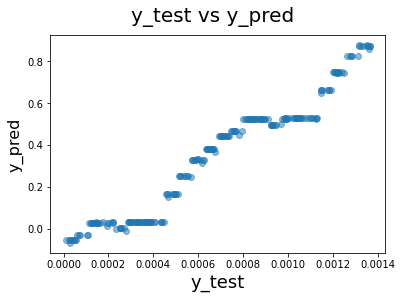

In [103]:
# Model Evalution:

## Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y - label
plt.show()

In [104]:
# R^2 Value for TEST

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1364570.019755207

In [105]:
X_test.shape

(219, 10)

In [107]:
# We already have the value of R^2 (calculated in above step)

r2=-1364570.019755207

In [108]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-1430174.3957049767

In [ ]:
#  FINAL REPORT
## As per our final Model, the top 3 predictor variables that influences the bike booking are:

### Temperature (temp) - A coefficient value of ‘0.2582’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.2582 units.

### Month of May (mnth_may) - A coefficient value of ‘-0.0285’ indicated that, w.r.t mnth_jan, a unit increase in mnth_may variable decreases the bike hire numbers by 0.0285 units.

### Year (yr) - A coefficient value of ‘0.4958 ’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.4958  units.